In [1]:
import numpy as np
import scipy as sp
import scipy.linalg
import cvxpy as cp
import matplotlib.pyplot as plt
import random
import math
import sys

In [2]:
plt.plot(probab_list, ber_list)
plt.ylabel('BER')
plt.xlabel('p')
plt.title('BER for ' + str(n) + ',' + str(k) + ' code from Gottesman')
plt.grid()
plt.tight_layout()

plt.show()

# saveName = './plots/1' + errSaveName + '_' + str(n) + ',' + str(k) + '_iter_' + str(tot_iter) + '_totp_' + str(tot_probabs) + '.png'
# plt.savefig(saveName)
# print(saveName)

In [3]:
def NormalizeState(ipVal):
    if(sp.linalg.norm(ipVal) == 0): return ipVal
    else : return ipVal / sp.linalg.norm(ipVal)
    
def NKron(*args):
  result = np.array([[1.0]])
  for op in args:
    result = np.kron(result, op)
  return result
    
def NKronModified(checkRowMod):
  result = np.array([[1.0]])
  for ind in checkRowMod:
    if(ind == 0):
        op = Id
    elif(ind == 1):
        op = X
    elif(ind == 2):
        op = Y
    elif(ind == 3):
        op = Z
    result = np.kron(result, op)
  return result

def getGenerator(checkRow):
    checkRowModified = np.zeros(n, dtype=int)
    
    checkRowModified[(checkRow[:n] == checkRow[n:]) & (checkRow[n:] == 1)] = 2
    checkRowModified[(checkRow[:n] == 1) & (checkRowModified != 2)] = 1
    checkRowModified[(checkRow[n:] == 1) & (checkRowModified != 2)] = 3
    
    return NKronModified(checkRowModified)  

In [4]:
NormalizeState = lambda state: state / sp.linalg.norm(state)
zero = np.array([[1.0], [0.0]]) # |0>
one = np.array([[0.0], [1.0]]) # |1>

## Generators

In [5]:
def NKronModified(checkRowMod):
  result = np.array([[1.0]])
  for ind in checkRowMod:
    if(ind == 0):
        op = Id
    elif(ind == 1):
        op = X
    elif(ind == 2):
        op = Y
    elif(ind == 3):
        op = Z
    result = np.kron(result, op)
  return result

def getGenerator(checkRow):
    checkRowModified = np.zeros(n, dtype=int)
    
    checkRowModified[(checkRow[:n] == checkRow[n:]) & (checkRow[n:] == 1)] = 2
    checkRowModified[(checkRow[:n] == 1) & (checkRowModified != 2)] = 1
    checkRowModified[(checkRow[n:] == 1) & (checkRowModified != 2)] = 3
    
    return NKronModified(checkRowModified)    

In [6]:
comparingAccuracy_decoded = 1e-7
comparingAccuracy_encoded = 1e-5
comparingAccuracy_syndrome = 1e-5
comparingAccuracy_method = 1e-5

In [7]:
# Hmatrix = np.array([[1,0,1,0,1,0,1],
#                     [0,1,1,0,0,1,1],
#                     [0,0,0,1,1,1,1]])

# na = Hmatrix.shape[1]
# nb = Hmatrix.shape[0]

# Hx = np.concatenate((np.kron(np.eye(na), Hmatrix), np.kron(Hmatrix.T, np.eye(nb))), axis=1)
# Hz = np.concatenate((np.kron(Hmatrix, np.eye(na)), np.kron(np.eye(nb), Hmatrix.T)), axis=1)

# H1 = np.concatenate((Hx, np.zeros([Hx.shape[0], Hx.shape[1]])), axis=1)
# H2 = np.concatenate((np.zeros([Hz.shape[0], Hz.shape[1]]), Hz), axis=1)

# checkMatrix = np.concatenate((H1, H2), axis=0)

In [8]:
# change check matrix here

checkMatrix = np.array([[1,1,1,1,1,1,1,1, 0,0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1],
                        [0,1,0,1,1,0,1,0, 0,0,0,0,1,1,1,1],
                        [0,1,0,1,0,1,0,1, 0,0,1,1,0,0,1,1],
                        [0,1,1,0,1,0,0,1, 0,1,0,1,0,1,0,1]])

# checkMatrix = np.array([[0,0,0,0,0,0,0,0,0, 1,1,0,0,0,0,0,0,0],
#                         [0,0,0,0,0,0,0,0,0, 1,0,1,0,0,0,0,0,0],
#                         [0,0,0,0,0,0,0,0,0, 0,0,0,1,1,0,0,0,0],
#                         [0,0,0,0,0,0,0,0,0, 0,0,0,1,0,1,0,0,0],
#                         [0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,1,1,0],
#                         [0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,1,0,1],
#                         [1,1,1,1,1,1,0,0,0, 0,0,0,0,0,0,0,0,0],
#                         [1,1,1,0,0,0,1,1,1, 0,0,0,0,0,0,0,0,0]])

# checkMatrix = np.array([[1,0,0,1,0, 0,1,1,0,0],
#                         [0,1,0,0,1, 0,0,1,1,0],
#                         [1,0,1,0,0, 0,0,0,1,1],
#                         [0,1,0,1,0, 1,0,0,0,1]])

# checkMatrix = np.array([[0,0,0,1,1,1,1, 0,0,0,0,0,0,0],
#                         [0,1,1,0,0,1,1, 0,0,0,0,0,0,0],
#                         [1,0,1,0,1,0,1, 0,0,0,0,0,0,0],
#                         [0,0,0,0,0,0,0, 0,0,0,1,1,1,1],
#                         [0,0,0,0,0,0,0, 0,1,1,0,0,1,1],
#                         [0,0,0,0,0,0,0, 1,0,1,0,1,0,1]])

n = int(checkMatrix.shape[1]/2)
k = n-checkMatrix.shape[0]

gi = np.zeros([n-k, 2**n, 2**n])
for i in range(n-k):
    gi[i,:,:] = getGenerator(checkMatrix[i,:])
    
# def gi(i):
#     return getGenerator(checkMatrix[i,:])

## Syndromes

In [26]:
def fillSyndromeTable(checkRowCorrect):
    # get error corresponding to the given vector
    err = getGenerator(checkRowCorrect)

    # get syndrome of that error
    syndrVal = np.zeros(n-k,dtype='int')
    for i in range(n-k):
        syndBool = np.all(     np.abs(np.matmul(np.matmul(err, gi[i,:,:]), err.transpose()) - gi[i,:,:]) < comparingAccuracy_syndrome    )
        if syndBool == True:
            syndrVal[i] = 1
        else:
            syndrVal[i] = -1

    # convert syndrome to index
    syndrIndex = int(''.join(['1' if x else '0' for x in syndrVal==1]), 2)

    # if not already updated, update the syndrome table
    if isFilledTable[syndrIndex] == 0:
        errorRecoveryList[syndrIndex, :] = checkRowCorrect
        isFilledTable[syndrIndex] = 1 

#### Weight 1 errors:

In [11]:
isFilledTable = np.zeros(2**(n-k))
errorRecoveryList = np.zeros([2**(n-k), 2*n])
string_format = '{:0>' + str(n) + '}'
totErrChecked = 0

fillSyndromeTable(np.zeros(2*n, dtype = 'int'))
totErrChecked = totErrChecked + 1

myIndex = 1
while(myIndex < 2**(n)):
    # generate weight 1 vectors
    checkRow = list(string_format.format("{:b}".format(myIndex)))
    checkRow = list(map(int, checkRow))
    
    # weight 1 error with X, then Y and then Z 
    fillSyndromeTable(np.append(np.asarray(checkRow), np.zeros(n, dtype = 'int')))
    fillSyndromeTable(np.append(np.zeros(n, dtype = 'int'), np.asarray(checkRow)))
    fillSyndromeTable(np.append(np.asarray(checkRow), np.asarray(checkRow)))
    
    totErrChecked = totErrChecked + 3
        
    myIndex = myIndex*2   

In [12]:
print(str(np.sum(isFilledTable == 1)) + ' entries filled out of total ' + str(isFilledTable.shape[0]) + ' syndromes, number of errors checked = ' + str(totErrChecked))

25 entries filled out of total 32 syndromes, number of errors checked = 25


#### Weight 2 errors:

In [13]:
myIndex1 = 1
while(myIndex1 < 2**(n)):
    # generate weight 1 vectors
    checkRow1 = list(string_format.format("{:b}".format(myIndex1)))
    checkRow1 = np.asarray(list(map(int, checkRow1)))
    
    myIndex2 = myIndex1*2
    while(myIndex2 < 2**n):
        # generate another weight 1 vector
        checkRow2 = list(string_format.format("{:b}".format(myIndex2)))
        checkRow2 = np.asarray(list(map(int, checkRow2)))
        
        #generate weight 2 vector
        checkRow3 = list(string_format.format("{:b}".format(myIndex2)))
        checkRow3 = np.asarray(list(map(int, checkRow3)))
        checkRow3[checkRow1 == 1] = 1
        
        # add weight 2 errors with XX, XY, XZ, ...
        fillSyndromeTable(np.append(checkRow3, np.zeros(n, dtype = 'int')))
        fillSyndromeTable(np.append(checkRow3, checkRow1))
        fillSyndromeTable(np.append(checkRow2, checkRow1))
        
        fillSyndromeTable(np.append(checkRow3, checkRow2))
        fillSyndromeTable(np.append(checkRow3, checkRow3))
        fillSyndromeTable(np.append(checkRow2, checkRow3))
        
        fillSyndromeTable(np.append(checkRow1, checkRow2))
        fillSyndromeTable(np.append(checkRow1, checkRow3))      
        fillSyndromeTable(np.append(np.zeros(n, dtype = 'int'), checkRow3))
        
        totErrChecked = totErrChecked + 9
        myIndex2 = myIndex2*2
        
    myIndex1 = myIndex1*2   

In [14]:
print(str(np.sum(isFilledTable == 1)) + ' entries filled out of total ' + str(isFilledTable.shape[0]) + ' syndromes, number of errors checked = ' + str(totErrChecked))

32 entries filled out of total 32 syndromes, number of errors checked = 277


#### Weight 3 errors:

In [15]:
myIndex1 = 1
tempcount = 0
tempc = 0
while(myIndex1 < 2**(n)):
    # generate weight 1 vectors
    checkRowList = np.zeros([n, 4])
    
    checkRow1 = list(string_format.format("{:b}".format(myIndex1)))
    checkRow1 = np.asarray(list(map(int, checkRow1)))
    
    checkRowCombined1 = list(string_format.format("{:b}".format(myIndex1)))
    checkRowCombined1 = np.asarray(list(map(int, checkRowCombined1)))
    
    myIndex2 = myIndex1*2
    while(myIndex2 < 2**n):
        # generate another weight 1 vector
        checkRow2 = list(string_format.format("{:b}".format(myIndex2)))
        checkRow2 = np.asarray(list(map(int, checkRow2)))
        
        checkRowCombined2 = list(string_format.format("{:b}".format(myIndex2)))
        checkRowCombined2 = np.asarray(list(map(int, checkRowCombined2)))
        
        myIndex3 = myIndex2*2
        while(myIndex3 < 2**n):
            # generate another weight 1 vector
            checkRow3 = list(string_format.format("{:b}".format(myIndex3)))
            checkRow3 = np.asarray(list(map(int, checkRow3)))
            
            # generate weight 2 and 3 vectors
            checkRowCombined3 = list(string_format.format("{:b}".format(myIndex3)))
            checkRowCombined3 = np.asarray(list(map(int, checkRowCombined3)))
            
            checkRowCombined4 = list(string_format.format("{:b}".format(myIndex3)))
            checkRowCombined4 = np.asarray(list(map(int, checkRowCombined4)))
            
            checkRowCombined1[checkRow2 == 1] = 1
            checkRowCombined2[checkRow3 == 1] = 1
            checkRowCombined3[checkRow1 == 1] = 1
            
            checkRowCombined4[checkRow2 == 1] = 1
            checkRowCombined4[checkRow1 == 1] = 1
            
            fillSyndromeTable(np.append(checkRowCombined4, np.zeros(n, dtype = 'int')))
            fillSyndromeTable(np.append(checkRowCombined4, checkRow1))
            fillSyndromeTable(np.append(checkRowCombined4, checkRow2))
            fillSyndromeTable(np.append(checkRowCombined4, checkRow3))
            fillSyndromeTable(np.append(checkRowCombined4, checkRowCombined1))
            fillSyndromeTable(np.append(checkRowCombined4, checkRowCombined2))
            fillSyndromeTable(np.append(checkRowCombined4, checkRowCombined3))
            fillSyndromeTable(np.append(checkRowCombined4, checkRowCombined4))
            fillSyndromeTable(np.append(checkRowCombined3, checkRowCombined4))
            fillSyndromeTable(np.append(checkRowCombined2, checkRowCombined4))
            fillSyndromeTable(np.append(checkRowCombined1, checkRowCombined4))
            fillSyndromeTable(np.append(checkRow3, checkRowCombined4))
            fillSyndromeTable(np.append(checkRow2, checkRowCombined4))
            fillSyndromeTable(np.append(checkRow1, checkRowCombined4))
            fillSyndromeTable(np.append(np.zeros(n, dtype = 'int'), checkRowCombined4))
            
            fillSyndromeTable(np.append(checkRowCombined3, checkRowCombined2))
            fillSyndromeTable(np.append(checkRowCombined3, checkRowCombined1))
            fillSyndromeTable(np.append(checkRowCombined3, checkRow2))
            fillSyndromeTable(np.append(checkRowCombined2, checkRowCombined3))
            fillSyndromeTable(np.append(checkRowCombined1, checkRowCombined3))
            fillSyndromeTable(np.append(checkRow2, checkRowCombined3))
            
            fillSyndromeTable(np.append(checkRowCombined2, checkRowCombined1))
            fillSyndromeTable(np.append(checkRowCombined2, checkRow1))
            fillSyndromeTable(np.append(checkRowCombined1, checkRowCombined2))
            fillSyndromeTable(np.append(checkRow1, checkRowCombined2))
            
            fillSyndromeTable(np.append(checkRowCombined1, checkRow3))
            fillSyndromeTable(np.append(checkRow3, checkRowCombined1))

            totErrChecked = totErrChecked + 27
            if(np.sum(isFilledTable == 1) == isFilledTable.shape[0]):
                break
            myIndex3 = myIndex3*2
        
        if(np.sum(isFilledTable == 1) == isFilledTable.shape[0]):
            break
        myIndex2 = myIndex2*2
    
    if(np.sum(isFilledTable == 1) == isFilledTable.shape[0]):
        break
    myIndex1 = myIndex1*2 

In [16]:
print(str(np.sum(isFilledTable == 1)) + ' entries filled out of total ' + str(isFilledTable.shape[0]) + ' syndromes, number of errors checked = ' + str(totErrChecked))

32 entries filled out of total 32 syndromes, number of errors checked = 304


## Encoding

In [17]:
def NKron1DGeneral(ipArray):
    result = np.array([[1.0]])
    for i in ipArray:
        if(i==1):
            op = one
        elif(i==0):
            op = zero
        result = np.kron(result, op)
    return result

#### Get generator matrix G

In [18]:
Gmatrix = np.eye(gi[0,:,:].shape[0], gi[0,:,:].shape[1]) # generator matrix corresponding to this code
for i in range(n-k):
    Gmatrix = Gmatrix + np.matmul(gi[i,:,:], Gmatrix)
Gmatrix = np.round(Gmatrix)

#### Get non-zero and unique columns of G

In [19]:
# get boolean array if the columns are zero or not
zeroCols = np.zeros(Gmatrix.shape[1])
for i in range(Gmatrix.shape[1]):
    zeroCols[i] = all(Gmatrix[:,i] == np.zeros(Gmatrix.shape[0]))

# get indices of non-zero columns
nonZeroColsList = np.argwhere(zeroCols==0).flatten()

# get all non zero columns
GmatrixNonZero = np.zeros([Gmatrix.shape[0], nonZeroColsList.shape[0]])
i = 0
for ind in nonZeroColsList:
    GmatrixNonZero[:,i] = Gmatrix[:,ind]
    i = i+1

# get all non zero and unique columns and there indices
GmatrixNonZeroUniqueInd, nonZeroUniqueInd = np.unique(GmatrixNonZero, axis = 1, return_index=True)
nonZeroUniqueInd = nonZeroColsList[nonZeroUniqueInd]

In [20]:
print('Rank of G = ' + str(np.linalg.matrix_rank(Gmatrix)))
print('Shape of G = ' + str(Gmatrix.shape))

Rank of G = 8
Shape of G = (256, 256)


In [21]:
# syndrome lookup table
def SyndromeLookUp(syndr):
    errorSyndromeIndex = int(''.join(['1' if x else '0' for x in np.ndarray.astype( np.round(syndr.flatten()), int) == 1]), 2)
    recov = errorRecoveryList[errorSyndromeIndex]
    return recov

In [23]:
errorRecoveryList[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [33]:
def getSyndromeFromError(channel_error):
    tx_qbits = np.ones(2**k)
    tx_qbits = NormalizeState(tx_qbits)

    # Convert qbits to tensor product format
    tx_decoded = np.zeros(2**n)
    # get extended qbits corresponding to non-zero column indices of G matrix
    i = 0
    for nonZeroIndex in np.sort(nonZeroUniqueInd):
        if(i>=2**k):
            break
        tx_decoded[nonZeroIndex] = tx_qbits[i]
        i = i+1
    tx_decoded = NormalizeState(tx_decoded)

    # encode transmit qbits
    tx_encoded = NormalizeState(tx_decoded) # encoded transmit qbits
    for i in range(n-k):
        tx_encoded = tx_encoded + np.matmul(gi[i,:,:], tx_encoded) # encode using generators
    tx_encoded = NormalizeState(tx_encoded) # encoded transmit qbits

    # channel
    rx_erry = np.dot(channel_error, tx_encoded) # received qbits with errors

    # syndrome check
    syndr = np.zeros([n-k, 1]) # syndrome
    for i in range(n-k):
        syndr[i] = np.dot(rx_erry.transpose(), np.dot(gi[i,:,:], rx_erry))
        
        
    return np.ndarray.astype(np.round(syndr), 'int').flatten()

## Channel and Decoding

#### For different values of p and over many iterations

In [47]:
tot_probabs = 10
tot_iter = 1000

probab_list = np.linspace(0,0.3333,tot_probabs)
myError_list = np.zeros(tot_probabs)
ber_list = np.zeros(tot_probabs)

ind_probab = 0
avgError = 0


for p_xyz in probab_list:
    ber = 0
    print('Training model for p = ' + str(p_xyz))
#     model = train_model(p_xyz, tot_samples, tot_layers, hidden_dim, hidden_actvn, output_actvn, loss_func, optimizer, metrics, verbose_bool)
    
    myError = 0
    tot_iter_temp = tot_iter
    print('Iterating for p = ' + str(p_xyz))
    for iter_ind in range(tot_iter):
        
        # channel
        p_channel = [1-3*p_xyz, p_xyz, p_xyz, p_xyz] 
        errMatrix = np.random.multinomial(1, p_channel, size=n)
        errCheckRowModified = errMatrix@np.array([0,1,2,3])

        # syndrome check
        syndr = getSyndromeFromError(NKronModified(errCheckRowModified))
    
        # error correction
        recov = SyndromeLookUp(syndr) # error recovery

        errRecov = np.zeros(n)
        errRecov[(recov[:n] == recov[n:]) & (recov[n:] == 1)] = 2
        errRecov[(recov[:n] == 1) & (errRecov != 2)] = 1
        errRecov[(recov[n:] == 1) & (errRecov != 2)] = 3
        
        ber = ber + np.sum(errCheckRowModified != errRecov)
        sys.stdout.write('\r')
        sys.stdout.write("[%-40s] Progress = %d%%, " % ('='*int(np.round(((iter_ind+1)/tot_iter)*39))+'>', ((iter_ind+1)/tot_iter)*100) + ' BER = ' + str(ber/(iter_ind*n+n)))
        sys.stdout.flush()
    
    ber = ber/(tot_iter*n)
    myError = myError/tot_iter_temp
    avgError = myError
    
    myError_list[ind_probab] = myError
    ber_list[ind_probab] = ber
    
    ind_probab = ind_probab + 1
    print(' ')

Training model for p = 0.0
Iterating for p = 0.0
[=======================================>] Progress = 100%,  BER = 0.0 
Training model for p = 0.037033333333333335
Iterating for p = 0.037033333333333335
[=======================================>] Progress = 100%,  BER = 0.0919109109109109 
Training model for p = 0.07406666666666667
Iterating for p = 0.07406666666666667
[=======================================>] Progress = 100%,  BER = 0.2402549049049048 
Training model for p = 0.1111
Iterating for p = 0.1111
[=======================================>] Progress = 100%,  BER = 0.3828755775775787 
Training model for p = 0.14813333333333334
Iterating for p = 0.14813333333333334
[=======================================>] Progress = 100%,  BER = 0.4901251561561567 
Training model for p = 0.18516666666666667
Iterating for p = 0.18516666666666667
[=======================================>] Progress = 100%,  BER = 0.593125433433434 
Training model for p = 0.2222
Iterating for p = 0.2222
[========

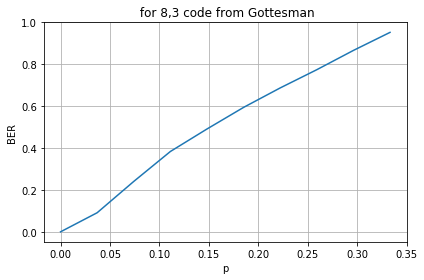

In [51]:
plt.plot(probab_list, ber_list)
plt.ylabel('BER')
plt.xlabel('p')
plt.title(' for ' + str(n) + ',' + str(k) + ' code from Gottesman')
plt.grid()
plt.tight_layout()

# saveName = './plots/' + errSaveName + '_' + str(n) + ',' + str(k) + '_iter_' + str(tot_iter) + '_totp_' + str(tot_probabs) + '.png'
plt.show()
# plt.savefig(saveName)
# print(saveName)

In [ ]:
plt.plot(probab_list, myError_list)
plt.ylabel(errString)
plt.xlabel('p')
plt.title(errString + ' for ' + str(n) + ',' + str(k) + ' code from Gottesman')
plt.grid()
plt.tight_layout()

saveName = './plots/1' + errSaveName + '_' + str(n) + ',' + str(k) + '_iter_' + str(tot_iter) + '_totp_' + str(tot_probabs) + '.png'
plt.show()
# plt.savefig(saveName)
print(saveName)

### TODO
- Implement minimum fidelity
- Generate plots for other codes


- Check how decoding is done in Gottesman (to fix the null-space problem)
- Maybe try implementing the circuits if there are any


- Maybe start generating data

## Rough